In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 11.1.1 Standard distributions

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


<Figure size 432x288 with 0 Axes>

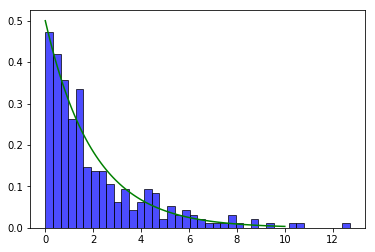

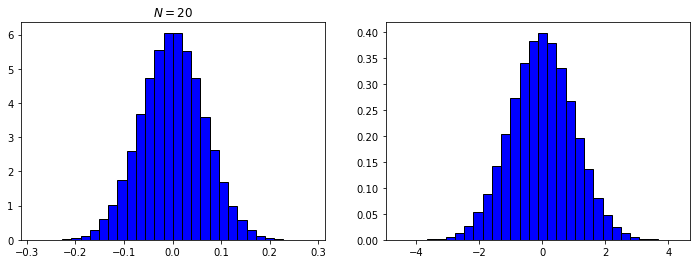

<Figure size 432x288 with 0 Axes>

In [2]:
# Exponential distribution
N = 100
lambda_ = 0.5
y = np.linspace(0, 10, N)
py = lambda_*np.exp(-lambda_*y)
plt.figure()
plt.plot(y,py,c='green')

z = np.random.uniform(0,1,3*N)
yz = -1/lambda_*np.log(1-z)
pyz = lambda_*np.exp(-lambda_*yz)
# plt.scatter(yz,pyz,marker='o', s=50, c='',edgecolors='blue')
plt.hist(yz, bins=40,normed=1,color='blue',edgecolor="black",alpha=0.7)

# Gaussian distribution
n = 100000
N = 20
X = np.zeros([N, n])
for i in range(N):
    X[i,:] = np.random.uniform(low = 0, high = 1, size = n)
    
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.hist(X.mean(axis=0)-.5, bins=30, normed=1, facecolor='b', edgecolor='black')
plt.title('$N = 20$')

x1 = np.random.uniform(0,1,n)
x2 = np.random.uniform(0,1,n)
y1 = np.sqrt(-2*np.log(x1)) * np.cos(2*np.pi*x2)
y2 = np.sqrt(-2*np.log(x1)) * np.sin(2*np.pi*x2)
y = np.r_[y1,y2]
plt.subplot(1,2,2)
plt.hist(y,bins=30, normed=1, facecolor='b', edgecolor='black')
plt.figure()

# 11.1.2 Rejection sampling

(array([5.24427530e-04, 5.24427530e-04, 5.24427530e-04, 0.00000000e+00,
        0.00000000e+00, 5.24427530e-04, 5.24427530e-04, 1.57328259e-03,
        0.00000000e+00, 2.09771012e-03, 1.04885506e-03, 2.09771012e-03,
        1.04885506e-03, 2.09771012e-03, 4.19542024e-03, 4.19542024e-03,
        3.67099271e-03, 8.39084049e-03, 6.29313037e-03, 6.81755790e-03,
        6.29313037e-03, 1.20618332e-02, 1.04885506e-02, 1.94038186e-02,
        1.88793911e-02, 1.78305360e-02, 1.83549636e-02, 2.09771012e-02,
        2.46480939e-02, 2.41236664e-02, 3.61854996e-02, 3.67099271e-02,
        4.35274850e-02, 4.24786300e-02, 4.82473328e-02, 4.24786300e-02,
        5.50648907e-02, 5.76870284e-02, 8.02374122e-02, 8.23351223e-02,
        9.75435207e-02, 8.39084049e-02, 8.54816875e-02, 1.10129781e-01,
        1.12751919e-01, 1.22191615e-01, 1.22716042e-01, 1.46839709e-01,
        1.40546578e-01, 1.44217571e-01, 1.49986274e-01, 1.65719100e-01,
        1.77780933e-01, 1.77256505e-01, 1.93513759e-01, 2.171129

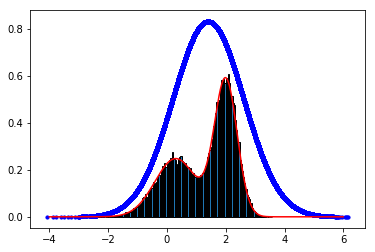

In [4]:
def f1(x):
    return (0.3*np.exp(-(x-0.3)**2) + 0.7* np.exp(-(x-2.)**2/0.3))/1.2113
x = np.arange(-4.,6.,0.01)
plt.figure()
plt.plot(x,f1(x),color = "red")

size = int(1e+05)
sigma = 1.2
z = np.random.normal(loc = 1.4,scale = sigma, size = size)
qz = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5*(z-1.4)**2/sigma**2)
k = 2.5
plt.scatter(z,k*qz,marker='o',c='blue',s=10)
#z = np.random.uniform(low = -4, high = 6, size = size)
#qz = 0.1
#k = 10
u = np.random.uniform(low = 0, high = k*qz, size = size)

pz =  0.3*np.exp(-(z-0.3)**2) + 0.7* np.exp(-(z-2.)**2/0.3)
sample = z[pz >= u]
plt.hist(sample,bins=150, normed=True, edgecolor='black')

Text(2.7, 0.5, '$kq(z)$')

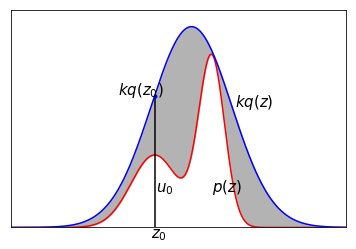

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return 0.3*np.exp(-(x-0.3)**2) + 0.7* np.exp(-(x-2.)**2/0.3)
def f2(x):
    sigma =1.2
    return 2.5/(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5*(x-1.4)**2/sigma**2)
x = np.arange(-4.,6.,0.01)

plt.plot(x,f1(x),color = "red")
plt.plot(x,f2(x),color = "blue")
plt.xticks([])
plt.yticks([])
plt.ylim(0,0.9)
plt.xlim(-4,6)
plt.plot([0.3,0.3],[0,0.54601532],color = "black")
plt.plot(0.3,0.54601532,'b.')
plt.fill_between(x,f1(x),f2(x),color = (0.7,0.7,0.7))
plt.annotate('$z_0$',xy=(0.,0),xytext=(0.2,-0.04),fontsize=15)
plt.annotate('$u_0$',xy=(0.,0.),xytext=(0.35,0.15),fontsize=15)
plt.annotate('$kq(z_0)$',xy=(0.,0.),xytext=(-0.8,0.55),fontsize=15)
plt.annotate('$p(z)$',xy=(0.,0.),xytext=(2,0.15),fontsize=15)
plt.annotate('$kq(z)$',xy=(0.,0.),xytext=(2.7,0.5),fontsize=15)

# 11.2 Markov Chain Monte Carlo

# 11.2.2 The Metropolis-Hastings algorithm